### THE INFINITE "UNSQUARE" POTENTIAL

##### initial imports

In [1]:
# interactive plots
%matplotlib notebook

# importing modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialise figures
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (9, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
# define colours, for ease of plotting
c_code = 0 # integer used to index array of colours c
c = ["b", "g", "r", "c", "m", "y", "k", "w"]

In [4]:
# define constants
m = 9.10938356*10**(-31) # mass of electron (kg)
h_bar = 1.0545718*10**(-34) # h bar (Js)
e = 1.60217662*10**(-19) # charge of electron (C)

##### Introduction

This project was conducted to solve quantum mechanical problems of a particle in an infinite potential well using computational approaches found from solving boundary value problems for a one-dimensional time-independent Schrodinger equation [1].

[1] $$-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)$$

To solve such problems, the fourth order Runge-Kutta function and Secant method were defined and used to approximate solutions of ordinary differential equations, where these computational approaches were used to solve the energy eigenvalues and the associated wavefunctions for the infinite sqare well, as well as for the infinite "unsquare" well of a harmonic potential, a finite square well and a coulomb potential. 

### ------------------------------------------------------------ Infinite Square Well -------------------------------------------------------------------

In [5]:
# initial variables
a = 5*10**(-11) # half-width of potential well (m)
N = 1000 # Runge-Kutta calculation points
h = 2*a/N # size of the intervals between x_points
x_points = np.arange(-a, a, h) # array of 1000 x points between -a and a with a step difference of h

Firstly, to test such computational methods the boundary value problem for the infinite square well was solved.

For a particle in a square potential well of width $2a$ with inifnitely high walls, the potential $V(x)$ takes the form of the equation [2].  

[2]
$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} 
$$

As the particle has a potential of $V(x) = ∞$ outside and $V(x) = 0$ inside the well, the following function *V(x)* was defined to return $0$ for all values of x within the infinite square well:

In [6]:
def V(x):
    '''
    potential function for an infinite square well, 
    where infinite outside well and zero inside well
    input: x 
    output: 0.0 
    '''
    return 0.0 

Seperating out out the Schrodinger equation into 2 first-order equations yields [3]:

[3]
$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$

where the following function *function* was defined to calculate the right-hand side of these equations:

In [7]:
def function(r, x, E):
    """
    TISE function split into 2 seperate ODEs
    input: r (vector of psi and phi), x (position of particle), E (energy level of the system)
    output: an array of points of psi and phi differentiated with respect to x
    """
    psi = r[0]
    phi = r[1]
    d_psi = phi 
    d_phi = (2*m/h_bar**2)*(V(x) - E)*psi
    return np.array([d_psi,d_phi])

To approximate such solutions to the function, the fourth-order Runge Kutta method function *RungeKutta2d* was defined as follows:

In [8]:
def RungeKutta2d(r, x_points, function, E):
    '''
    fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    input: r (vector of psi and phi), x_points (an array of x values), function (the function to use to solve the system),
           E (energy eigenvalue of the energy state n)
    output: [psi_points, phi_points]: solutions for psi(x) and phi(x), numpy arrays of same length as x_points
    '''
    ### fourth-order Runge Kutta method taken from PHAS0028-Session7Euler&Runge-KuttaMethod script ###
    psi_points = []
    phi_points = []
    for x in x_points:
        psi_points.append(r[0])
        phi_points.append(r[1])
        k1 = h*function(r, x, E) 
        k2 = h*function(r+0.5*k1, x+0.5*h, E)
        k3 = h*function(r+0.5*k2, x+0.5*h, E)
        k4 = h*function(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([psi_points, phi_points]) 

In [9]:
def plot(wf1, wf2, n):
    '''
    plots a figure with both analytical and numerical wavefunctions
    input: wf1 (analytical wavefunction), wf2 (numerical wavefunction), n (energy state)
    output: plots figure 
    '''
    plt.figure()
    plt.plot(x_points, wf1, c[c_code+3] + "-", label = "normalised analytical wavefunction")
    plt.plot(x_points, wf2, c[c_code+4] + "--", label = "normalised numerical wavefunction")
    plt.axvline(x = -a, c = 'k', ls = '-', lw = 1)
    plt.axvline(x = a, c = 'k', ls = '-', lw = 1)
    plt.legend(loc = "lower right")
    plt.grid(True)
    plt.title("Comparison of Normalised Analytical and Numerical Wavefunctions for Energy State: " + "n = " + str(n))
    plt.xlabel("$x$ (m)")
    plt.ylabel("wavefunction, $\psi_{}(x)$".format({n}))

#### 1: Finding the ground state energy

The boundary conditions for the infinite square well were already known where $\psi = 0$ at $x = ±a$, where as $\phi$'s initial condition was to multiply the wavefunction by a constant, hence any starting value could be chosen. As $r = (\psi, \phi)$:

In [10]:
def defineR(n):
    '''
    assign initial values for the vector r (psi, phi)
    input: n (energy state)
    output: r (initial values for the vector r)
    '''
    r = np.array([0, (-1)**np.floor(n/2)])
    return r

*(-1)^np.floor(n/2) was used for the definition of $\phi$ to match the appropriate phases of the wavefunctions with the analytical*

As the Schrodinger equation [1] was an eigenvalue equation, it only had solutions at particular values of the energy E, where for other values there were no solutions that fulfilled the boundary conditions. Therefore, the initial values for E were found through the secant method (root-finding method) by defining a function *predictE*, which generated 2 appropriate predictions for E from equation [3], which were then implemented into the secant method:

[3]
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In [11]:
def predictE(d, n):
    '''
    generates 2 initial guesses E1 and E2 from the ground state energy function, 
    which is then used in combination with the secant method to give a correct prediction for E
    input: d (factor to change difference in E1 and E2), n (energy state)
    output: E3 (correct prediction for E)
    '''
    E = np.pi**2*h_bar**2*n**2/(2*m*(2*a)**2) # predicting E using the ground state energy equation [3]
    E1, E2 = E-E/d, E+E/d # guesses of E +/- E/10
    print("Initial guess of E1:", E1, "J")
    print("Initial guess of E2:", E2, "J")
    ### secant method taken from PHAS0029-Session10-SecantMethod script ###
    V1 = RungeKutta2d(r,x_points,function,E1)[0,N-1] # indexing the 0th row (psi_points) and N-1th column (last element from psi_points)
    V2 = RungeKutta2d(r,x_points,function,E2)[0,N-1]
    tolerance = e/1000               
    while abs(E2-E1) > tolerance:
        E3 = E2 - V2*(E2-E1)/(V2-V1)  
        E1 = E2 
        E2 = E3 
        V1 = RungeKutta2d(r,x_points,function, E1)[0,N-1]
        V2 = RungeKutta2d(r,x_points,function, E2)[0,N-1]
    print("Final elements of both wavefunctions from E1 and E2:", (V1, V2))
    print("Prediction of energy eigenvalue for energy state n = " + str(n) + " :", E3, "J")
    print("Calculated energy eigenvalue for energy state n = " + str(n) + " :", E, "J")
    return E3

The 2 predictions $E1$ and $E2$ were taken by $E±(E/d)$, where d (which can be changed when calling the function) determines the seperation between the predictions being made, hence the accuracy in the final prediction of the energy eigenvalue. 

Solving for the first ground state energy gives the following prediction of the energy eigenvalue at n = 1:

In [12]:
# finding ground state energy
r = defineR(1) # initialise r 
E1 = predictE(10, 1) # prediction of energy eigen value for n = 1

Initial guess of E1: 5.4222005647797716e-18 J
Initial guess of E2: 6.62713402361972e-18 J
Final elements of both wavefunctions from E1 and E2: (-1.6042182161689903e-16, -6.900509363719862e-20)
Prediction of energy eigenvalue for energy state n = 1 : 6.036734735268345e-18 J
Calculated energy eigenvalue for energy state n = 1 : 6.024667294199746e-18 J


The final elements of the wavefunctions predicted were both very close to zero, thus the secant method was able to fulfill the boundary conditions. Furthermore, the precentage difference between the predicted and calculated ground state energies was $\approx 0.2$%, which shows the accuracy in the method used. 

#### 2: Finding the ground state wavefunction

The wavefunctions generated from above were normalised with equation [4], where the trapezoidal rule was used [5] to calculate the definite integral:

[4]
$$
\int | \psi(x) |^2 {\rm d} x = 1
$$

[5]
$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$

In [13]:
def Normalisation(wavefunction, E):
    '''
    normalises the wavefunction 
    input: wavefunction (original wavefunction), E (energy state)
    output: normalised wavefunction
    '''
    I = h*(0.5*RungeKutta2d(r, x_points, function, E)[0,0]**2 + 0.5*RungeKutta2d(r, x_points, function, E)[0,N-1]**2 + \
           np.sum(RungeKutta2d(r, x_points, function, E)[0, 1:N-2]**2)) # trapezoidal rule
    return wavefunction/np.sqrt(I) # nomalising by dividing the wavefunction by the normalisation constant

In order to compare the wavefunctions generated with the analytical (theoretical) known wavefunctions of the system [6], the following function *analyticalW* was defined:

[6]
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

In [14]:
def analyticalW(n):
    '''
    generates the analytical wavefunction for the infinite square well at a specific energy level
    input: n (energy state)
    output: analyticalW (an array of points for the analytical wavefunction)
    '''
    analyticalW = [] # create empty list of ypoints for analytical wavefunction
    if n % 2 == 1: # if n is odd
        for x in x_points:
            analyticalW.append(1/np.sqrt(a)*np.cos(n*np.pi*x/(2*a)))
    elif n % 2 == 0: # if n is even
        for x in x_points:
            analyticalW.append(1/np.sqrt(a)*np.sin(n*np.pi*x/(2*a)))
    return analyticalW

Plotting the wavefunctions give the following figures:

<IPython.core.display.Javascript object>


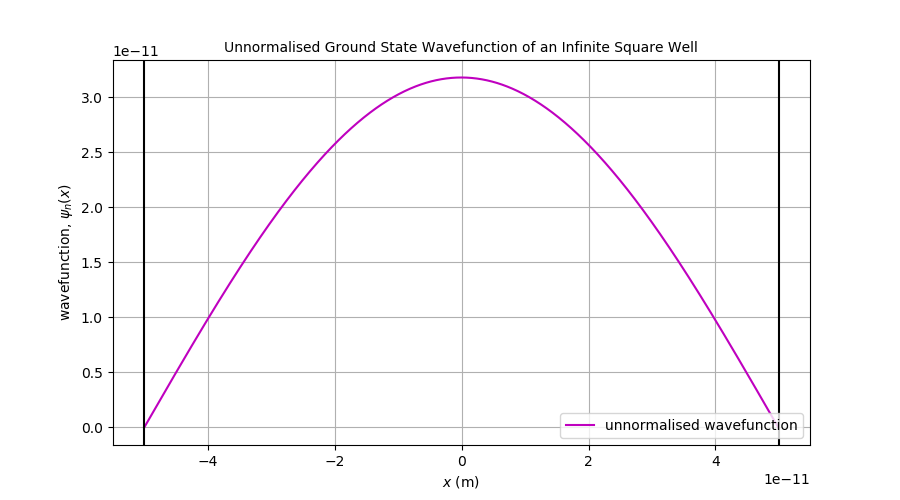

<IPython.core.display.Javascript object>


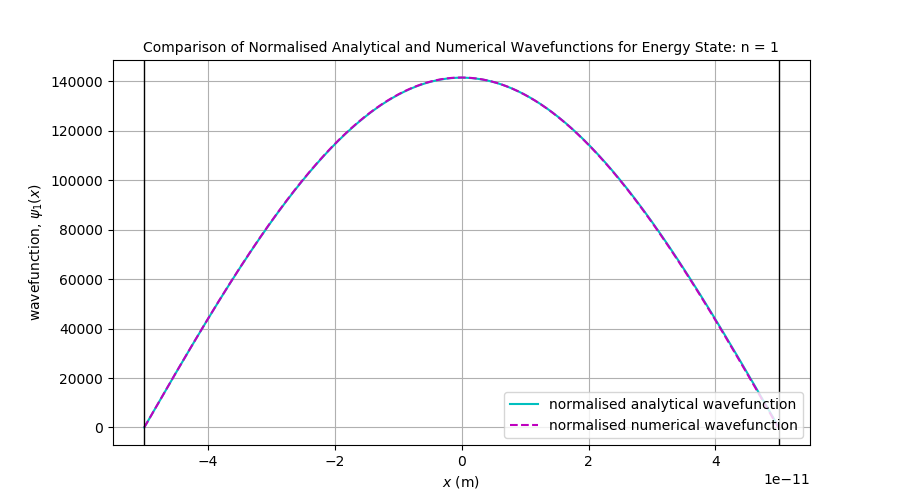

In [15]:
# define wavefunction for ground state
wavefunction1 = RungeKutta2d(r, x_points, function, E1)

# plot wavefunction on figure 
plt.figure()
plt.grid(True)
plt.plot(x_points, wavefunction1[0], "m-", label = "unnormalised wavefunction")
plt.axvline(x = -a, c = 'k', ls = '-', lw = 1.5)
plt.axvline(x = a, c = 'k', ls = '-', lw = 1.5)
plt.legend(loc = "lower right")
plt.title("Unnormalised Ground State Wavefunction of an Infinite Square Well")
plt.xlabel("$x$ (m)")
plt.ylabel("wavefunction, $\psi_{n}(x)$");

# plot numerical wavefunction against the analytical wavefunction for n = 1
plot(analyticalW(1), Normalisation(wavefunction1[0], E1), 1);

As seen from the figure above, the normalised analytical wavefunction generated from equation [6] and the normalised numerical wavefunction generated from the computational methods show very similar results, hence justifying the methodical approaches. However, zooming into the figure show small discrepancies between the 2 wavefunctions, thus improving the accuracy in the predicted energy could diminish such differences. 

#### 3: Finding the higher energy states

In [16]:
def predictE(d, n):
    '''
    generates 2 initial guesses E1 and E2 from the ground state energy function, 
    which is then used in combination with the secant method to give a correct prediction for E
    input: d (factor to change difference in E1 and E2), n (energy state)
    output: E3 (correct prediction for E)
    '''
    E = np.pi**2*h_bar**2*n**2/(2*m*(2*a)**2)
    E1, E2 = E-E/d, E+E/d # guesses of E +/- E/10
    ### secant method taken from PHAS0029-Session10-SecantMethod script ###
    V1 = RungeKutta2d(r,x_points,function,E1)[0,N-1] # indexing the 0th row (psi_points) and N-1th column (last element from psi_points)
    V2 = RungeKutta2d(r,x_points,function,E2)[0,N-1]
    tolerance = e/1000               
    while abs(E2-E1) > tolerance:
        E3 = E2 - V2*(E2-E1)/(V2-V1)  
        E1 = E2 
        E2 = E3 
        V1 = RungeKutta2d(r,x_points,function, E1)[0,N-1]
        V2 = RungeKutta2d(r,x_points,function, E2)[0,N-1]
    print("Prediction of energy eigenvalue for energy state n = " + str(n) + " :", E3, "J")
    print("Calculated energy eigenvalue for energy state n = " + str(n) + " :", E, "J")
    return E3

*redefined the function predictE to reduce print statements*

In [17]:
def plotAll(d, n):
    '''
    a function that defines all required variables used for the plot() function and then runs plot()
    input: d (factor to change difference in E1 and E2), n (energy state)
    output: plots figure
    '''
    r = defineR(n)
    E = predictE(d, n)
    wf1 = analyticalW(n) # y points for the analytical wavefunction
    wf2 = Normalisation(RungeKutta2d(r, x_points, function, E)[0], E) # y points for the numerical wavefunction
    plot(wf1, wf2, n)

To further justify the computational methods used, the approach was tested for higher energy states:

Prediction of energy eigenvalue for energy state n = 2 : 2.414693895250982e-17 J
Calculated energy eigenvalue for energy state n = 2 : 2.4098669176798983e-17 J


<IPython.core.display.Javascript object>


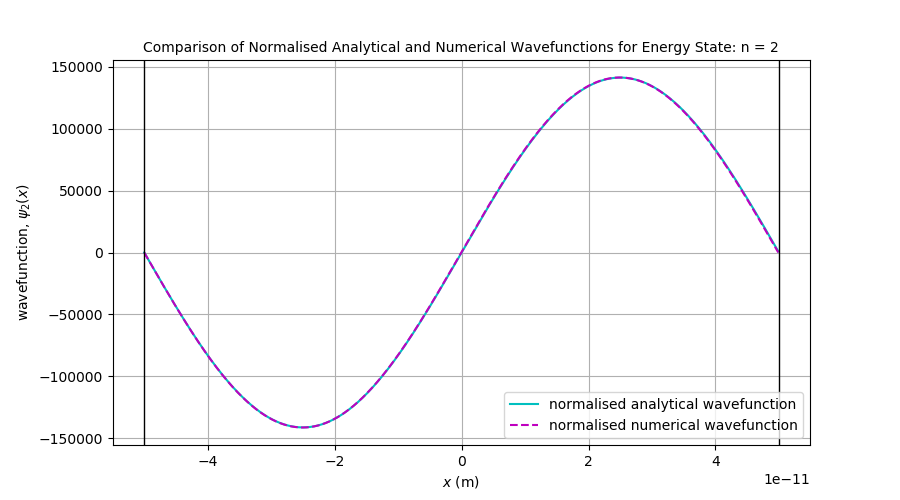

Prediction of energy eigenvalue for energy state n = 3 : 5.433061254944226e-17 J
Calculated energy eigenvalue for energy state n = 3 : 5.422200564779771e-17 J


<IPython.core.display.Javascript object>


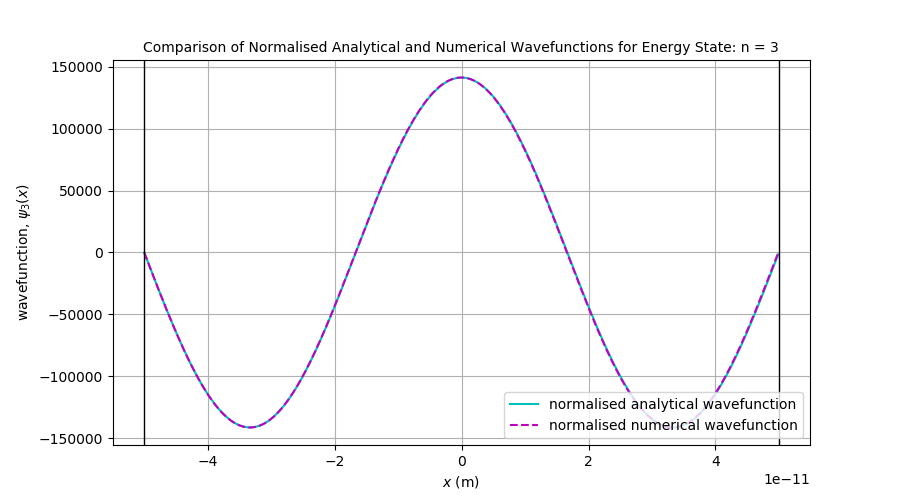

Prediction of energy eigenvalue for energy state n = 4 : 9.658775567100189e-17 J
Calculated energy eigenvalue for energy state n = 4 : 9.639467670719593e-17 J


<IPython.core.display.Javascript object>


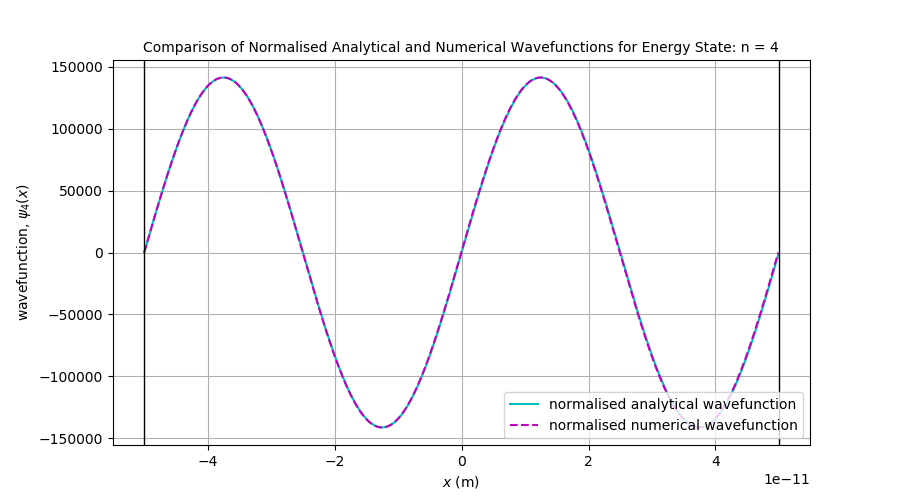

Prediction of energy eigenvalue for energy state n = 5 : 1.509183683267012e-16 J
Calculated energy eigenvalue for energy state n = 5 : 1.5061668235499366e-16 J


<IPython.core.display.Javascript object>


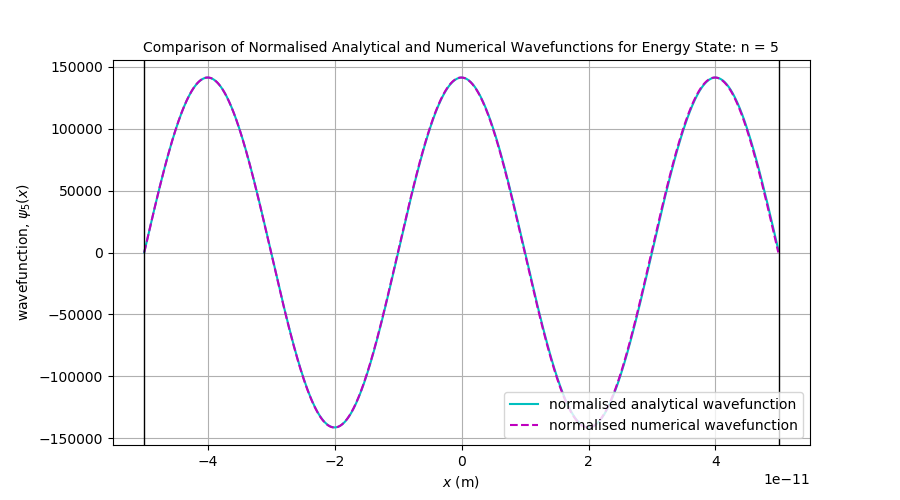

In [18]:
# loop through plotALL for n = (2, 3, 4, 5)
for n in range(2,6):
    plotAll(10, n)

##### n ~ 20

Prediction of energy eigenvalue for energy state n = 20 : 3.4256095596412128e-15 J
Calculated energy eigenvalue for energy state n = 20 : 2.4098669176798986e-15 J


<IPython.core.display.Javascript object>


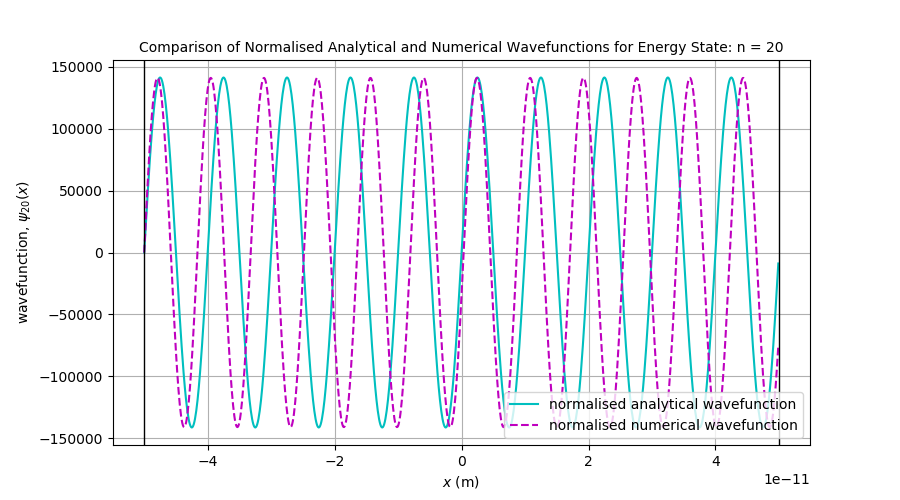

Prediction of energy eigenvalue for energy state n = 20 : 2.414694519628788e-15 J
Calculated energy eigenvalue for energy state n = 20 : 2.4098669176798986e-15 J


<IPython.core.display.Javascript object>


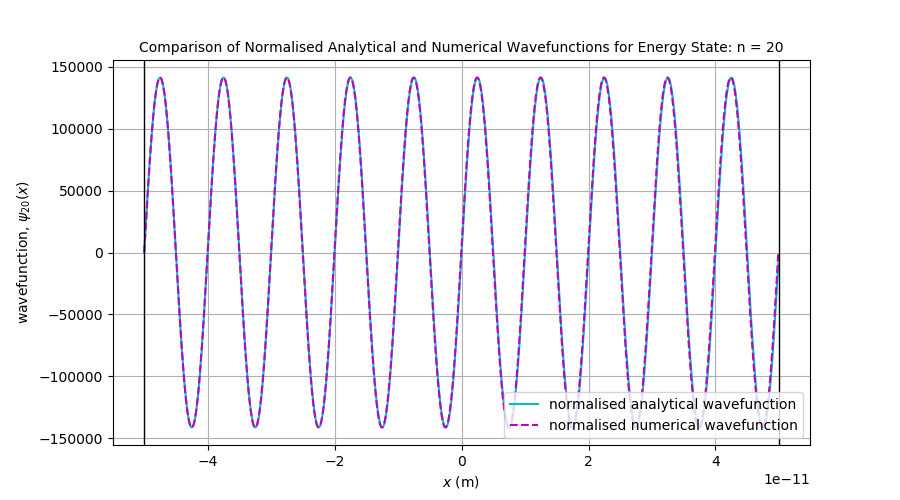

In [19]:
# plot numerical wavefunction against the analytical wavefunction for n = 20
plotAll(10, 20) # E predictions of E +/- E/10
plotAll(100, 20) # E predictions of E +/- E/100

As expected, the normalised analytical and numerical wavefunctions continued to show a perfect match, which helped to further justify the approach used. However, for $n = 20$ the analytical and numerical wavefunctions were completely off as the prediction of the energy eigenvalues were largely different. To compensate for this, the difference between the predictions of E were reduced by increasing $d$ from 10 to 100. This gave a much better result where both the analytical and numerical wavefunctions for energy state $n = 20$ were able to match. 

### ---------------------------------------------------- The Infinite "Unsquare" Well --------------------------------------------------------------

In [20]:
# initial variables
a = 5*10**(-11) # half-width of the infinite potential well (m)
N = 1000 # Runge-Kutta calculation points
h = 2*a/N
x_points = np.arange(-a, a, h) # array of x_points 

As the computational methods used were justified by solving the infinite square well, these methods were then used to solve for systems that were not easily solvable analytically. 

#### 1: Harmonic oscillator potential

The boundary conditions of the original problem could be kept as the infinite square walls remained for the following different unsquare potential wells. The first was a harmonic oscillator potential which takes the form of equation [7]:

[7]
$$
V(x) = V_0 \frac{x^2}{a^2}
$$

This gives a harmonic oscillator potential embedded within the infinite square well, where appropriate variables were defined:

In [21]:
V0 = 800*e # initial potential (J)
k = (2*V0)/(a**2) # bond force constant for a quantum harmonic oscillator 

The function *V(x)* was redefined for the harmonic potential:

In [22]:
def V(x):
    '''
    potential function for an infinite unsquare well, where infinite outside well
    input: x (position of particle)
    output: V (potential at position x)
    '''
    V = V0*x**2/a**2
    return V

In order to predict the energy eigenvalues for the harmonic oscillator, the same method was used though using the energy level equation for the harmonic oscillator [8]:

[8]
$$
E_n = \left[n - \frac{1}{2}\right]\hbar\omega
$$

$$
\omega = \sqrt{\frac{k}{m}}
$$

where $n - 1/2$ was used as the ground state energy level was defined as $n = 1$ instead of $n = 0$. (1)

In [23]:
def predictEharmonic(d, n):
    '''
    generates 2 initial guesses E1 and E2 for the harmonic oscillator from the energy level equation, 
    which is then used in combination with the secant method to give a correct prediction for E
    input: d (factor to change difference in E1 and E2), n (energy state)
    output: E3 (correct prediction for E)
    '''
    E = (n - 0.5)*h_bar*np.sqrt(k/m) # calculating E from equation [8]
    E1, E2 = E-E/d, E+E/d # guesses of E +/- E/10
    ### secant method taken from PHAS0029-Session10-SecantMethod script ###
    V1 = RungeKutta2d(r,x_points,function,E1)[0,N-1]
    V2 = RungeKutta2d(r,x_points,function,E2)[0,N-1]
    tolerance = e/1000               
    while abs(E2-E1) > tolerance:
        E3 = E2 - V2*(E2-E1)/(V2-V1)  
        E1 = E2 
        E2 = E3 
        V1 = RungeKutta2d(r,x_points,function, E1)[0,N-1]
        V2 = RungeKutta2d(r,x_points,function, E2)[0,N-1]
    print("Prediction of energy eigenvalue for energy state n = " + str(n) + " :", E3, "J")
    print("Calculated energy eigenvalue for energy state n = " + str(n) + " :", E, "J")
    return E3

In [24]:
def plot1(wf1, n, t, width):
    '''
    plots a figure for the numerical wavefunction
    input: wf1 (analytical wavefunction), n (energy state), t (title 0 or 1), width (width of the potential well)
    output: plots figure 
    '''
    # 2 titles to choose from
    title = ["Normalised Numerical Wavefunction for a Harmonic Potential Well at Energy State: " + "n = " + str(n), \
             "Normalised Numerical Wavefunction for a Finite Potential Well at Energy State: " + "n = " + str(n)] 
    plt.figure()
    plt.plot(x_points, wf1, c[c_code+4] + "-", label = "normalised wavefunction")
    plt.axvline(x = -width/2, c = 'k', ls = '-', lw = 1.5)
    plt.axvline(x = width/2, c = 'k', ls = '-', lw = 1.5)
    plt.legend(loc = "lower right")
    plt.grid(True)
    plt.title(title[t])
    plt.xlabel("$x$ (m)")
    plt.ylabel("wavefunction, $\psi_{}(x)$".format(n));

In [25]:
def plotAll1(d, n, t, width):
    '''
    a function that defines all required variables used for the plot1() function and then runs plot1()
    input: d (factor to change difference in E1 and E2), n (energy state), t (title 0 or 1), width (width of the potential well)
    output: E (prediction of energy eigenvalue for energy state n), plots figure
    '''
    r = defineR(n)
    E = predictEharmonic(d, n)
    wf1 = Normalisation(RungeKutta2d(r, x_points, function, E)[0], E)
    plot1(wf1, n, t, width)
    return E

##### energy states n = 1 ~ 3

With the new function to predict energy eigenvalues for the harmonic oscillator, the wavefunctions were plotted for energy states $n = 1$ ~ $3$.

Prediction of energy eigenvalue for energy state n = 1 : 1.7762281409805128e-17 J
Calculated energy eigenvalue for energy state n = 1 : 1.7690774458447996e-17 J


<IPython.core.display.Javascript object>


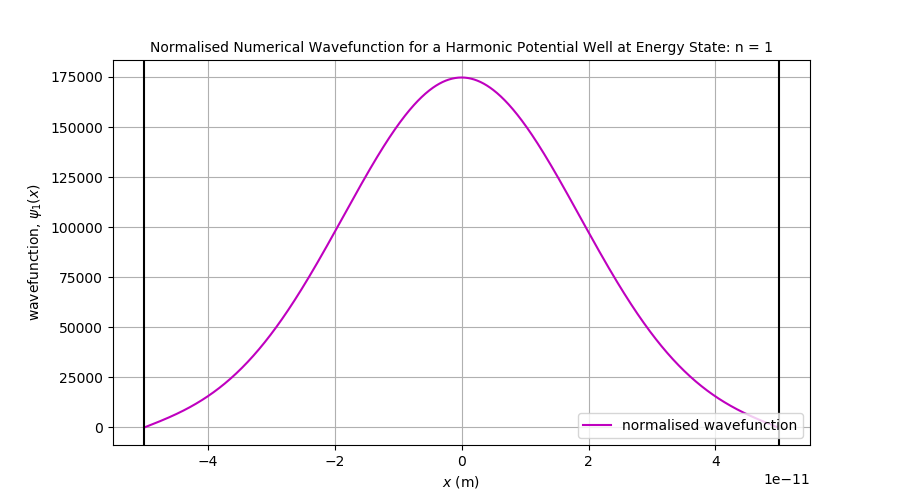

Prediction of energy eigenvalue for energy state n = 2 : 5.393953988878248e-17 J
Calculated energy eigenvalue for energy state n = 2 : 5.307232337534398e-17 J


<IPython.core.display.Javascript object>


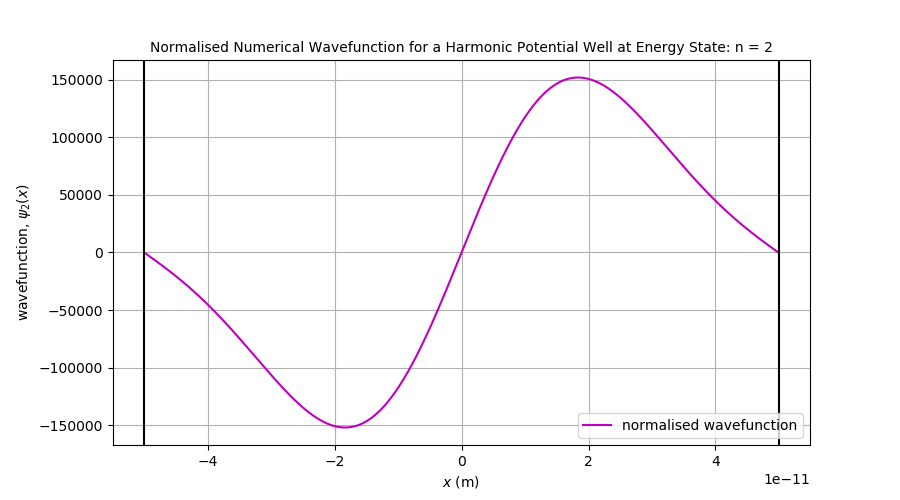

Prediction of energy eigenvalue for energy state n = 3 : 9.304213086661765e-17 J
Calculated energy eigenvalue for energy state n = 3 : 8.845387229223998e-17 J


<IPython.core.display.Javascript object>


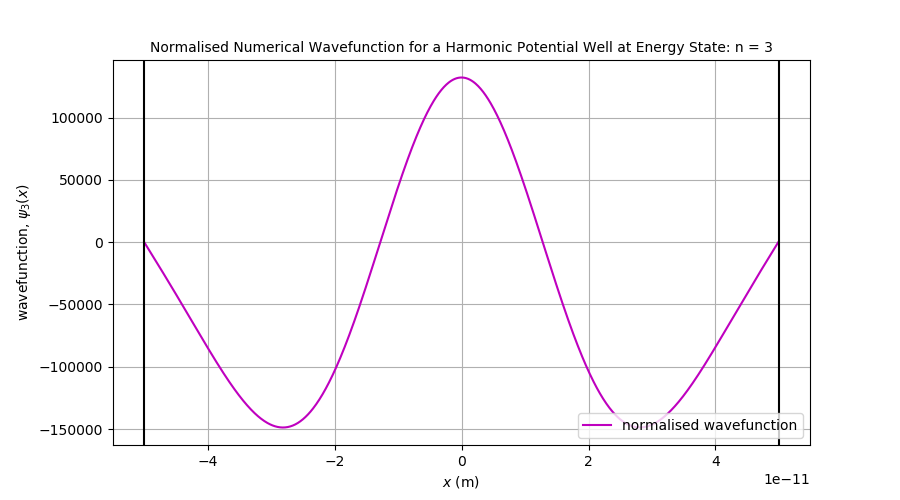

In [26]:
# loop through plotALL1 for n = (1, 2, 3)
Energy_harmonic = [] # empty list of energy eigenvalues for the harmonic potential well
for n in range(1,4):
    Energy_harmonic.append(plotAll1(100, n, 0, 2*a)) # store energy eigenvalues as list

For n = 1 energy eigenvalue is: (1.776) x 10^-17 J
For n = 2 energy eigenvalue is: (5.394) x 10^-17 J
For n = 3 energy eigenvalue is: (9.304) x 10^-17 J


<IPython.core.display.Javascript object>


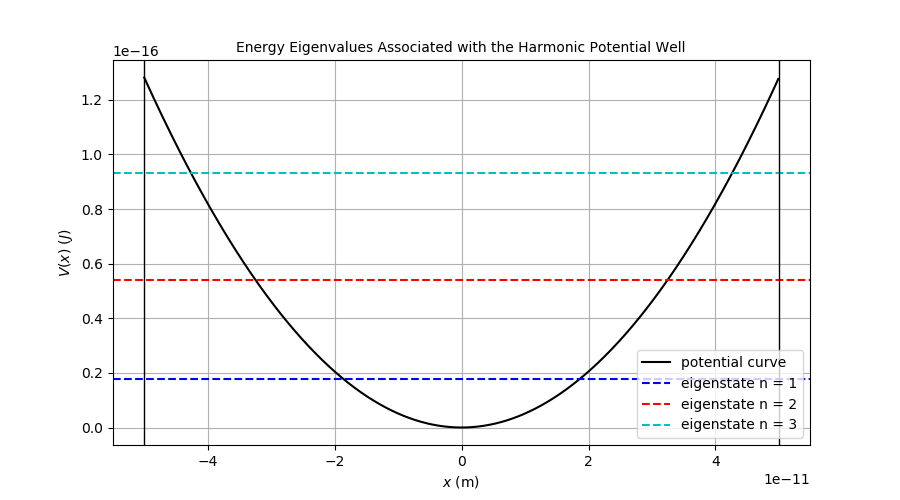

In [27]:
# print energy eigenvalues for n = 1 ~ 3
for n in range(len(Energy_harmonic)):
    print("For n = " + str(n+1) + " energy eigenvalue is: (" + "{0:0.3f}".format(Energy_harmonic[n]*(10**17)) + ") x 10^-17 J")

# plot energy eigenvalues associated with the harmonic potential well
plt.figure()
plt.grid(True)
plt.plot(x_points, 0.5*k*x_points**2, "k-", label = "potential curve")
plt.title("Energy Eigenvalues Associated with the Harmonic Potential Well")
plt.axhline(y = Energy_harmonic[0], c = c[c_code], ls = "--", lw = 1.5, label = "eigenstate n = 1")
plt.axhline(y = Energy_harmonic[1], c = c[c_code + 2], ls = "--", lw = 1.5, label = "eigenstate n = 2")
plt.axhline(y = Energy_harmonic[2], c = c[c_code + 3], ls = "--", lw = 1.5, label = "eigenstate n = 3")
plt.axvline(x = -a, c = 'k', ls = '-', lw = 1)
plt.axvline(x = a, c = 'k', ls = '-', lw = 1)
plt.legend(loc = "lower right")
plt.xlabel("$x$ (m)")
plt.ylabel("$V(x)$ $(J)$");

The predicted energy eigenvalues hold similiar for all 3 energy states, though the difference in the energy values were much larger for $n = 3$. The ground state wavefunction seen in the first figure was as expected, where at $x = 0$ the potential was at the lowest, which suggests that the probability of a particle existing at that point should be the highest, which infact holds true. For the second energy state there are 2 maximas for the probability of the position of the particle exisiting in the well. As the probability density function is proportional to $\psi^2$, the wavefunctions plotted for a larger n must have a shorter wavelength and a larger frequency as energy is proportional to frequency. This holds true for $n = 2$ and $n = 3$, where both plots show an increase in the frequency or a decrease in the wavelength of the wavefunction, thus an increase in the energy eigenvalues which can be seen from the plot above. Additionally, due to the harmonic potential well sitting inside an infinite square well, the wavefunctions decay towards the end points as the exisiting potentials reduce the probability for a particle to exist. The position at which the decay starts for each wavefunction depends on the point where the potential curve and the eigenstate line intersect, where for higher n values the decay points are much closer to the end points of the wavefunction due to the $x^2$ shape of the potential curve. 

Comparing to known results for harmonic oscillators, the numerical wavefunctions were very similar to that of results seen in other research papers (2), though certain wavefunctions (such as n = 3) were out of phase with the analytical results. However, as the probability density requires $\psi^2$ instead of $\psi$, the phase of the normalised numerical wavefunction holds no significance. 

#### 2: Finite square well

Keeping the same boundary conditions as before, the computational methods were now used for a finite square well which takes the form of equation [9]:

[9]
$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

This gives a finite square well with width $a$ embedded within the infinite square well. 

In [28]:
def V(x):
    '''
    potential function for a finite square well with potential V0 outside and zero inside well,
    where if x is an integer/float return 0 or V0, 
    whereas if x is a non integer/float and raises a ValueError, return an array V
    input: x (position of particle (integer/float or array))
    output: 0 or V0 (if x is an integer/float), V (if x is a non integer/float (an array of values for the potential))
    '''
    try:
        if -a/2 <= x <= a/2:
            return 0 
        elif abs(x) > a/2:
            return V0
    except ValueError:
        V = []
        for i in x:
            if -a/2 <= i <= a/2:
                V.append(0) 
            elif abs(i) > a/2:
                V.append(V0)
        return V

When plotting the finite potential well, the original *V(x)* function would raise a ValueError as the function was trying to run an array type object into a simple condition. This error was raised as python was unable to automatically index slice each element into the condition, but rather the whole array with 1000 elements was thrown into the condition. Therefore, the *V(x)* function was coded to manually index slice each element out of the array when a ValueError was raised, hence the usage of a *try* and *except* function. 

For predicting the energy eigenvalue using the secant method, the same function for the harmonic oscillator was used as it was expected that they would be similar due to the same particle being taken into consideration within the same boundary conditions.  

##### energy states n = 1 ~ 3

The numerical normalised wavefunctions were plotted for energy states $n = 1$ ~ $3$ with the finite square well.

Prediction of energy eigenvalue for energy state n = 1 : 1.4684986347315315e-17 J
Calculated energy eigenvalue for energy state n = 1 : 1.7690774458447996e-17 J


<IPython.core.display.Javascript object>


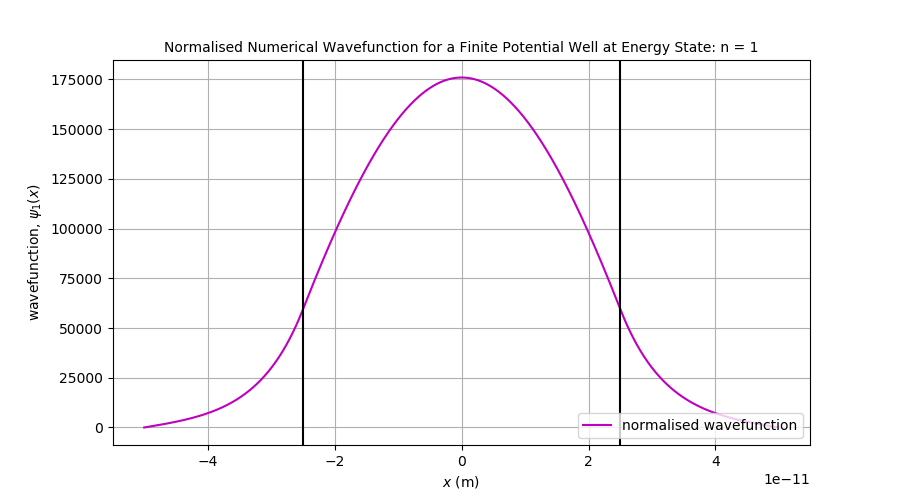

Prediction of energy eigenvalue for energy state n = 2 : 5.701173763133032e-17 J
Calculated energy eigenvalue for energy state n = 2 : 5.307232337534398e-17 J


<IPython.core.display.Javascript object>


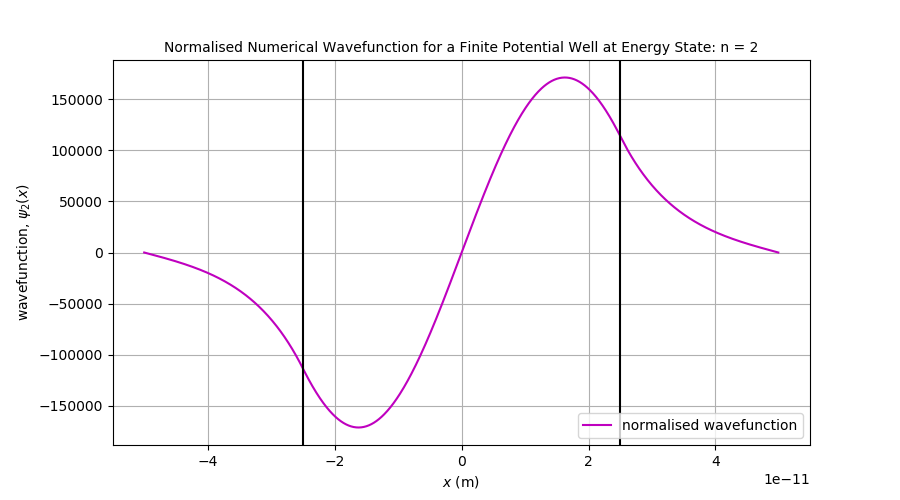

Prediction of energy eigenvalue for energy state n = 3 : 1.192820011218161e-16 J
Calculated energy eigenvalue for energy state n = 3 : 8.845387229223998e-17 J


<IPython.core.display.Javascript object>


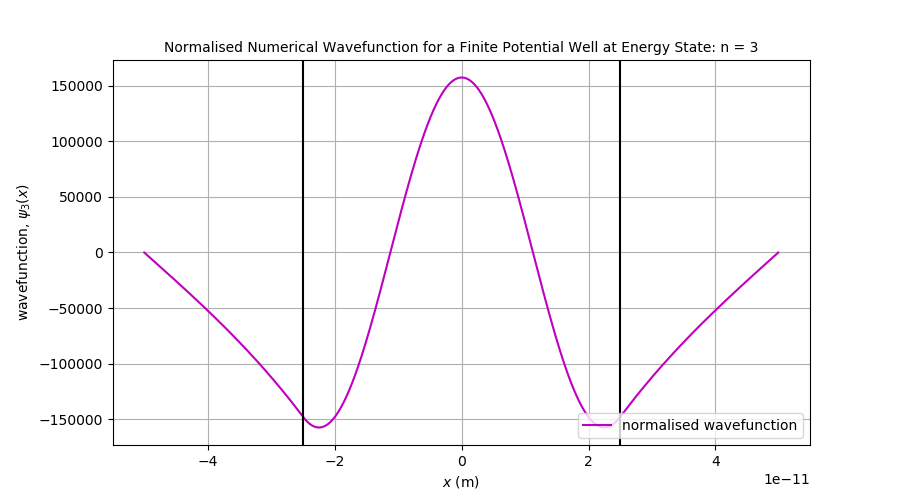

In [29]:
Energy_finite = [] # an empty list of energy eigenvalues for the finite square well
for n in range(1,4):
    Energy_finite.append(plotAll1(10, n, 1, a))

For n = 1 energy eigenvalue is: (1.468) x 10^-17 J
For n = 2 energy eigenvalue is: (5.701) x 10^-17 J
For n = 3 energy eigenvalue is: (11.928) x 10^-17 J


<IPython.core.display.Javascript object>


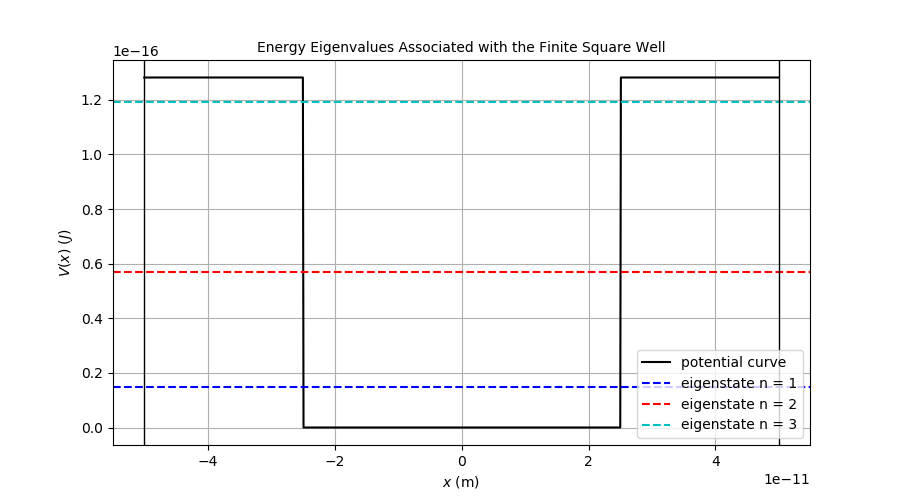

In [30]:
# print energy eigenvalues for n = 1 ~ 3
for n in range(len(Energy_finite)):
    print("For n = " + str(n+1) + " energy eigenvalue is: (" + "{0:0.3f}".format(Energy_finite[n]*(10**17)) + ") x 10^-17 J")

# plot energy eigenvalues associated with the finite square well
plt.figure()
plt.grid(True)
plt.plot(x_points, V(x_points), "k-", label = "potential curve")
plt.title("Energy Eigenvalues Associated with the Finite Square Well")
plt.axhline(y = Energy_finite[0], c = c[c_code], ls = "--", lw = 1.5, label = "eigenstate n = 1")
plt.axhline(y = Energy_finite[1], c = c[c_code + 2], ls = "--", lw = 1.5, label = "eigenstate n = 2")
plt.axhline(y = Energy_finite[2], c = c[c_code + 3], ls = "--", lw = 1.5, label = "eigenstate n = 3")
plt.axvline(x = -a, c = 'k', ls = '-', lw = 1)
plt.axvline(x = a, c = 'k', ls = '-', lw = 1)
plt.legend(loc = "lower right")
plt.xlabel("$x$ (m)")
plt.ylabel("$V(x)$ $(J)$");

As expected, an increase in the energy state would mean a decrease in the wavelength and an increase in the frequency of the wavefunctions. However, compared to the previous with the harmonic potential, the position of the decay points exist constantly for all energy states as seen in the plot above where all eigenstate lines intersect with the potential curve at the same position. Furthermore, due to the consistently small width of the finite square well, the decay in the wavefunctions appear more prominently than the harmonic potential. However, as the only difference between the harmonic and finite wells were the differences in shapes, this was why the shapes of the wavefunctions were both very similar to each other. This was also why the same energy predictions from the harmonic oscillator [8] were used, though this could have been the reason to why the predicted energy eigenvalue for $n = 3$ was fairly off compared to the calculated. 

Comparing the numerical wavefunctions to the known results for the finite square well, the wavefunctions were very similar to that of the wavefunctions seen in other research papers (1). Therefore, these methods were able to determine solutions to the finite square well. 

### Conclusion

By testing the computational method using both the secant and the fourth-order Runge Kutta methods on several boundary value problems including the infinite square well and the harmonic and finite potentials, the computational approach was well justified. The secant method was able to predict an energy eigenvalue very accurate to that of the expected value, though the predicted value became slighty less accurate as n increased. This was seen for both the harmonic and finite potentials, where the difference in the calculated and predicted energy eigenvalues were larger for $n = 3$. This could be due to the limitations within the secant method, as it is always not guranteed to converge correctly. Other root-finding methods such as Brent's method could have been used to eradicate such limitations. With that said, these computational methods were able to plot wavefunctions associated with each energy state without any significant problems. Though some of the numerical wavefunctions were inversed compared to that of the expected wavefunctions, as the probability density is proportional to $\psi^2$, these methods should be capable of solving other infinite unsquare well systems with intricate potentials. 

### References

(1) “Energy Levels.” Introduction to Applied Nuclear Physics , vol. 4, 2012, ocw.mit.edu/courses/nuclear-engineering/22-02-introduction-to-applied-nuclear-physics-spring-2012/lecture-notes/MIT22_02S12_lec_ch4.pdf.

(2) “THE HARMONIC OSCILLATOR.” Mst.edu, web.mst.edu/~parris/QuantumOne/Class_Notes/HarmonicOscillator.pdf.